In [ ]:
PROJECT TEAM ID: PTID-CDS-DEC-23-1712
PROJECT CODE : PRCP-1027-Skin Disorder
PROJECT NAME : Detecting the type of skin disorder

# Bussiness Case
- In this database we have to find the accuracy of diagnosing erythemato-squamous diseases in dermatology by addressing in         clinical and histological among disease.
- This database contains 33 attributes.Dermatological research and advancements benefit from comprehensive data encompassing 12
  clinical and 22 histological aspects.
- They all share the clinical features of erythema and scaling, with very little differences.
- Facilitating Decision-Making: A 0 to 3 scale provides a quantifiable framework for evaluating skin diseases, with 0 indicating   absence
  and 3 representing the maximum. Intermediate values (1 and 2) denote relative degrees, ensuring consistency in assessment.
- The skin disorder detection system not only aids in minimizing misdiagnosis and unnecessary treatments, resulting in cost       savings for patients and healthcare providers, but its implementation can also drive overall cost savings and resource           optimization in healthcare settings. Furthermore, this initiative contributes to medical research and data analysis, fostering   advancements in the field of dermatology.
- The skin disorder detection system ensures privacy compliance by removing patient names and identification numbers, protecting
  sensitive information in healthcare research. Simultaneously, it contributes to improved patient care and outcomes through       enhanced diagnosis accuracy and early identification suggestions, reinforcing its positive impact on overall                     healthcaredelivery

# Domain Analysis


#### The skin disorders mentioned in the dataset are:

#### Erythemato-squamous diseases
It is a term used to describe a group of skin conditions that have similar features. The word "erythema" refers to redness of the skin,
and "squamous" refers to the scaling or flaky appearance. So, these diseases typically cause redness and scaling on the skin.


#### Psoriasis:
Psoriasis is a skin condition where the skin cells multiply faster than usual, leading to red, itchy, and sometimes scaly patches. It's a
chronic condition that can come and go.

#### Seborrheic Dermatitis:
This is a common skin condition causing redness and flaky skin, often on the scalp (dandruff), face, or other parts of the body. It can
be itchy and may cause discomfort.

#### Lichen Planus:
Lichen planus is a rash that can affect the skin, nails, or mucous membranes inside the mouth. It usually appears as shiny, flattopped bumps that may be itchy.

#### Pityriasis Rosea:
Pityriasis rosea is a mild skin rash that often starts with a larger, pinkish patch ("herald patch") followed by smaller, scaly patches. It's
usually not serious and tends to go away on its own.

#### Pityriasis Rubra Pilaris:
Pityriasis rubra pilaris is a rare skin disorder that results in red-orange scaling patches and tiny bumps. It often starts on the elbows
and knees and may spread to other parts of the body.


In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from functools import reduce
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,accuracy_score,f1_score,precision_score,recall_score


In [548]:
data = pd.read_csv('dataset_35_dermatology.csv')
data

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3


In [437]:
### Basic Checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   erythema                                  366 non-null    int64 
 1   scaling                                   366 non-null    int64 
 2   definite_borders                          366 non-null    int64 
 3   itching                                   366 non-null    int64 
 4   koebner_phenomenon                        366 non-null    int64 
 5   polygonal_papules                         366 non-null    int64 
 6   follicular_papules                        366 non-null    int64 
 7   oral_mucosal_involvement                  366 non-null    int64 
 8   knee_and_elbow_involvement                366 non-null    int64 
 9   scalp_involvement                         366 non-null    int64 
 10  family_history                            366 non-

In [438]:
data.head()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
0,2,2,0,3,0,0,0,0,1,0,0,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,55,2
1,3,3,3,2,1,0,0,0,1,1,1,0,0,1,0,1,2,0,2,2,2,2,2,1,0,0,0,0,0,0,0,1,0,8,1
2,2,1,2,3,1,3,0,3,0,0,0,1,0,0,0,1,2,0,2,0,0,0,0,0,2,0,2,3,2,0,0,2,3,26,3
3,2,2,2,0,0,0,0,0,3,2,0,0,0,3,0,0,2,0,3,2,2,2,2,0,0,3,0,0,0,0,0,3,0,40,1
4,2,3,2,2,2,2,0,2,0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,0,2,2,3,2,3,0,0,2,3,45,3


In [439]:
data.tail()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
361,2,1,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,25,4
362,3,2,1,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,1,0,1,0,0,0,2,0,36,4
363,3,2,2,2,3,2,0,2,0,0,0,2,2,0,0,3,3,0,0,0,0,0,0,0,3,0,3,0,3,0,0,2,3,28,3
364,2,1,3,1,2,3,0,2,0,0,0,2,0,0,0,3,2,0,0,0,0,0,0,0,3,0,2,0,1,0,0,2,3,50,3
365,3,2,2,0,0,0,0,0,3,3,0,0,0,1,0,0,2,0,2,3,2,3,0,2,0,2,0,0,0,0,0,3,0,35,1


## Statistical Information

In [440]:
data.describe()

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,class
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,2.068306,1.795082,1.549180,1.366120,0.633880,0.448087,0.166667,0.377049,0.614754,0.519126,0.125683,0.404372,0.139344,0.546448,0.336066,1.368852,1.956284,0.527322,1.289617,0.663934,0.991803,0.633880,0.295082,0.363388,0.393443,0.464481,0.456284,0.953552,0.453552,0.103825,0.114754,1.866120,0.554645,2.803279
std,0.664753,0.701527,0.907525,1.138299,0.908016,0.957327,0.570588,0.834147,0.982979,0.905639,0.331946,0.869818,0.411790,0.815451,0.853139,1.104418,0.712512,0.757116,0.917562,1.056829,1.162161,1.034924,0.670578,0.759721,0.849406,0.864899,0.954873,1.130172,0.954744,0.450433,0.488723,0.726108,1.105908,1.597803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,4.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000


Find the if any null values are there in dataset

In [441]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

### Exploratory Data Analysis 
Exploratory Data Analysis (EDA) refers to the method of studying and exploring record sets to apprehend their predominant traits, discover patterns, locate outliers, and identify relationships between variables. EDA is normally carried out as a preliminary step before undertaking extra formal statistical analyses or modeling.

### Univariate Analysis
 This sort of evaluation makes a speciality of analyzing character variables inside the records set. It involves summarizing and visualizing a unmarried variable at a time to understand its distribution, relevant tendency, unfold, and different applicable records. Techniques like histograms, field plots, bar charts, and precis information are generally used in univariate analysis.

There is no corrupted values in the dataset

#### there is a linear value in Age

In [442]:
data['Age'].unique()

array(['55', '8', '26', '40', '45', '41', '18', '57', '22', '30', '20',
       '21', '10', '65', '38', '23', '17', '51', '42', '44', '33', '43',
       '50', '34', '?', '15', '46', '62', '35', '48', '12', '52', '60',
       '32', '19', '29', '25', '36', '13', '27', '31', '28', '64', '39',
       '47', '16', '0', '7', '70', '37', '61', '67', '56', '53', '24',
       '58', '49', '63', '68', '9', '75'], dtype=object)

In [443]:
data.Age

0      55
1       8
2      26
3      40
4      45
       ..
361    25
362    36
363    28
364    50
365    35
Name: Age, Length: 366, dtype: object

#### the a clinical attrributes are

In [444]:
data.columns

Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate', 'Age', 'class'],
      dtype='object')

In [445]:
data1 = data[['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement','family_history']]

### for Histopathological Attribute

In [446]:
data2 = data[['melanin_incontinence',
       'eosinophils_in_the_infiltrate', 'PNL_infiltrate',
       'fibrosis_of_the_papillary_dermis', 'exocytosis', 'acanthosis',
       'hyperkeratosis', 'parakeratosis', 'clubbing_of_the_rete_ridges',
       'elongation_of_the_rete_ridges',
       'thinning_of_the_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_of_the_granular_layer',
       'vacuolisation_and_damage_of_basal_layer', 'spongiosis',
       'saw-tooth_appearance_of_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_monoluclear_inflitrate',
       'band-like_infiltrate']]

In [447]:
data2.shape

(366, 22)

### Changing categorical data to numerical data

In [448]:
data['Age'] =  pd.to_numeric(data['Age'], errors='coerce').fillna(-1).astype(int)

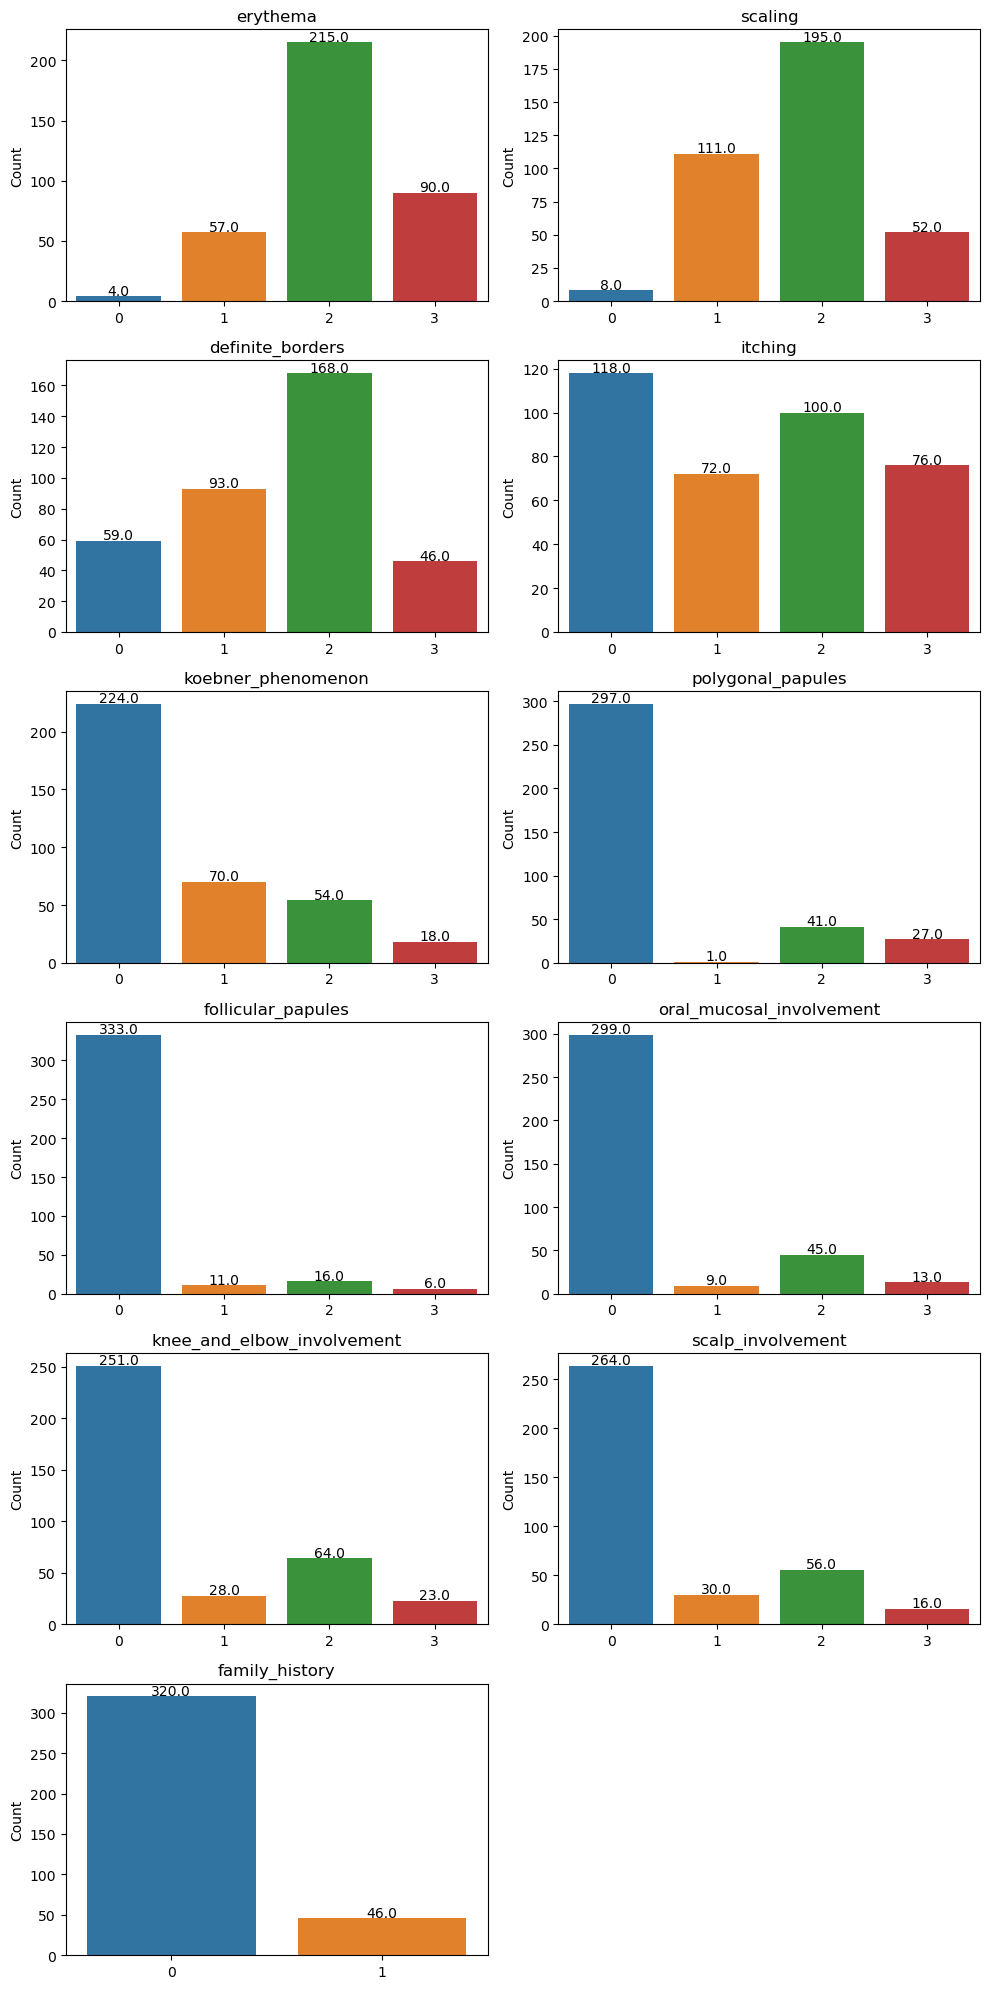

In [449]:
plt.figure(figsize=(10,20))
plotnumber = 1
for i in data1:
    ax =  plt.subplot(6,2, plotnumber)
    sns.countplot(x = data1[i])
    
    for j in ax.patches:
        ax.annotate(f'{j.get_height()}',(j.get_x() + j.get_width() / 2., j.get_height()),
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(i, loc='center')
    plotnumber = plotnumber + 1
    
plt.tight_layout()
plt.show()

### Insights from clinical features:

#### Erythema : 
: In the graph, 74.30% of people exhibit moderate-level symptoms categorized as level 1-2, while 24.50% are classified as
level 3, indicating serious symptoms. The remaining 0.01% show no symptoms.

### Definite Borders
71.30% exhibit moderate symptoms , 12.5% are classified as level 3 , and 16.1% show no symptoms.
Itching: Moderate symptoms are exhibited by 46.90%, while 20.70% are classified as level 3 , and 32.2% show no symptoms.

#### Koebner Phenomenon Overview: 
33.80% of individuals show moderate symptoms , 4.91% are categorized with serious symptoms,
and a significant majority of 61.20% display no symptoms related to Koebner Phenomenon.

#### Polygonal Papules: 81.14% of people are not affected.
Follicular Papules: 90.98% of people are not affected.
Oral Mucosal Involvement: 81.69% of people are not affected, while the remaining 18.31% show symptoms.

#### Scalp Involvement: 
72.13% are not affected, while 23.49% are moderately affected.

#### Family History:
87.43% of people do not have these skin issues in their family, while the remaining 12.56% do have skin problems

### Insights from histopathological features:


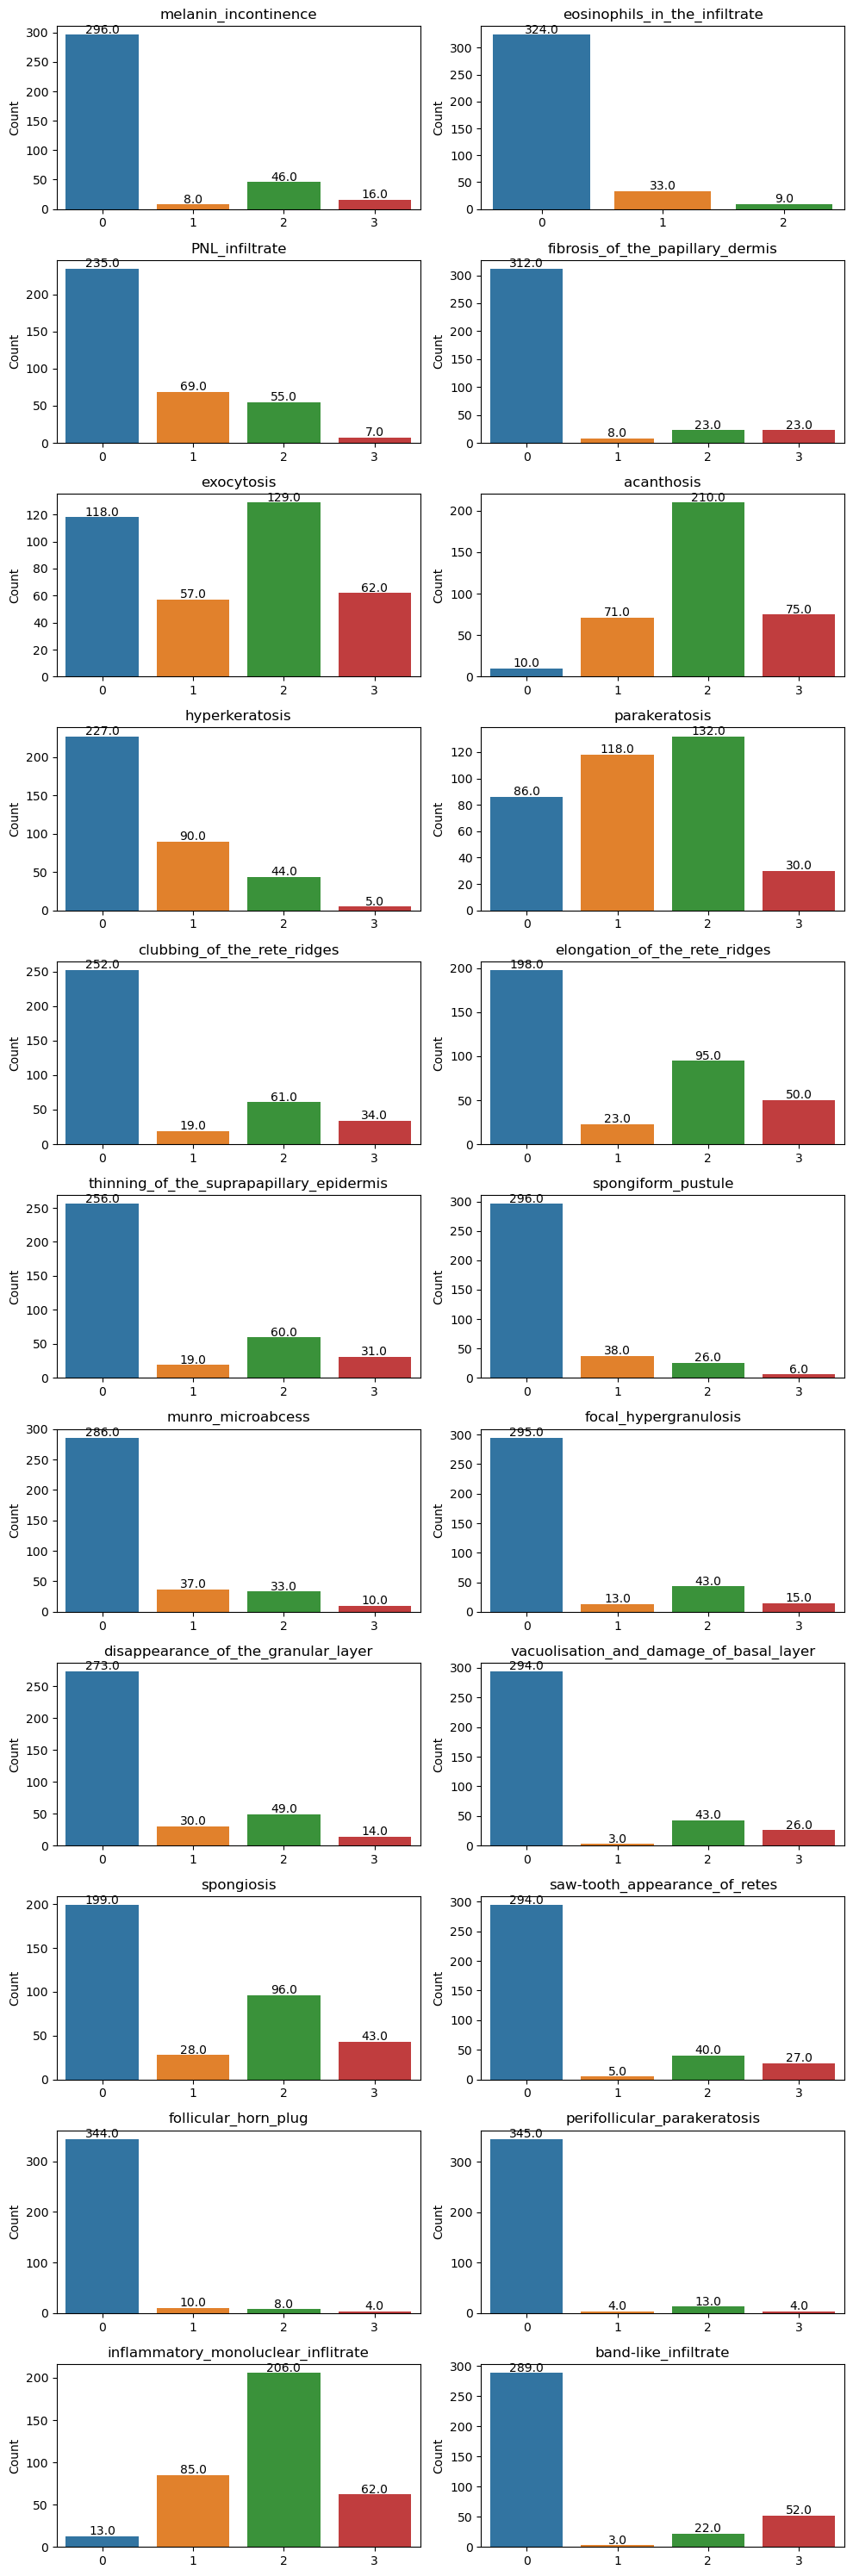

In [450]:
plt.figure(figsize=(10, 30))
plotnumber = 1

for i in data2:
    plt.subplot(11,2, plotnumber)
    ax = sns.countplot(x = data2[i])
    for j in ax.patches:
        ax.annotate(f'{j.get_height()}',(j.get_x() + j.get_width() / 2., j.get_height()),
                    ha='center', va='center', xytext=(0, 4), textcoords='offset points')

    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(i, loc='center')
    plotnumber = plotnumber + 1
    
plt.tight_layout()
plt.show()

Eosinophils in the Infiltrate: The majority, comprising 88.5%, exhibit no effects related to eosinophils in the infiltrate. PNL Infiltrate:
64.2% of individuals are unaffected, while 33.8% experience moderate effects.

Fibrosis of the Papillary Dermis: An overwhelming 85.2% of individuals show no signs of fibrosis in the papillary dermis.
    
Exocytosis: It affects individuals in varying degrees, with 50.8% moderately affected, 32.2% unaffected, and 16.9% severely affected.
    
Acanthosis: A significant portion, 76.7%, exhibits moderate effects of acanthosis, while 20.4% are severely affected.
    
Hyperkeratosis: The majority, constituting 62%, show no signs of hyperkeratosis, while 36.6% are moderately affected.
    
Parakeratosis: In terms of parakeratosis, 68.3% are moderately affected, 23.4% show no effects, and 8.1% are severely affected.
    
Clubbing of the Rete Ridges: A significant 68.8% of individuals are unaffected, 21.8% are moderately affected, and 9.2% are severely
affected by clubbing of the rete ridges.

Elongation of the Rete Ridges: 54.09% of individuals show no signs, 32.2% are moderately affected, and 13.6% are severely affected.
    
Thinning of the Suprapapillary Epidermis: 69.9% of individuals are not affected, 21.5% are moderately affected, and 8.4% are
severely affected. 
Disappearance of the Granular Layer: 74.5% of individuals are not affected, and 21.5% are moderately affected.
    
Spongiosis: 54.3% of individuals show no signs, 33.8% are moderately affected, and 11.7% are severely affected.
    
Inflammatory Mononuclear Infiltrate: 79.5% of individuals are moderately affected, and 16.9% are severely affected.

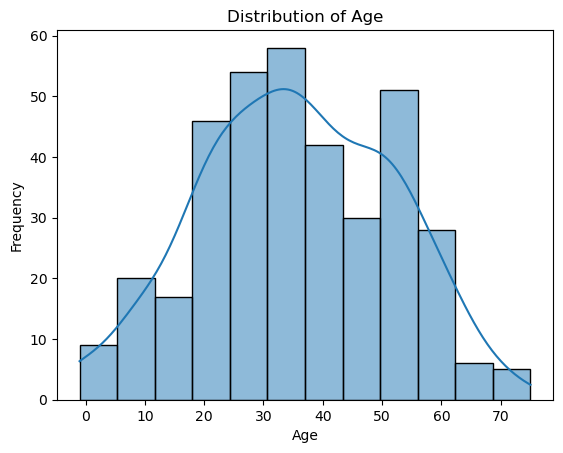

In [451]:
sns.histplot(x = data.Age,kde = True )
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

### Bivariate analysis

- Bivariate evaluation involves exploring the connection between  variables. It enables find associations, correlations, and dependencies between pairs of variables. Scatter plots, line plots, correlation matrices, and move-tabulation are generally used strategies in bivariate analysis.

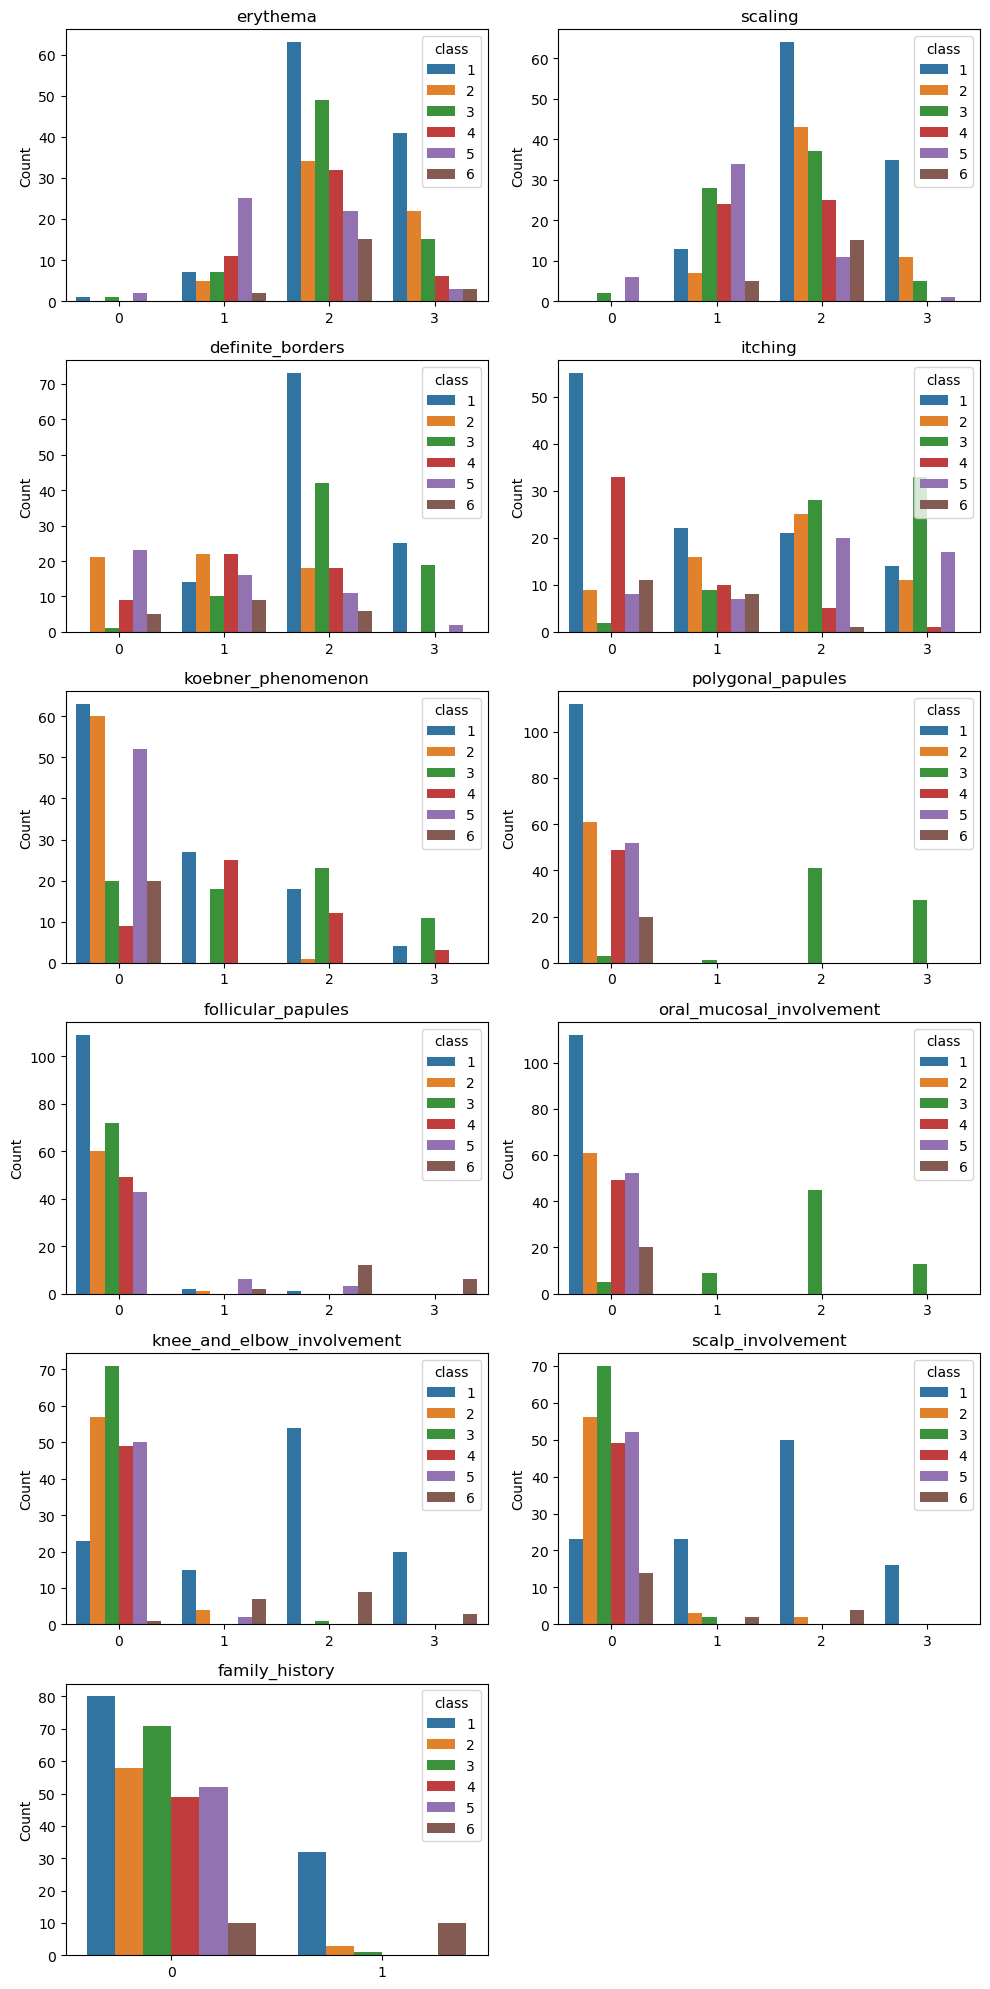

In [452]:
plt.figure(figsize=(10,20))
plotnumber = 1

for i in data1:
    plt.subplot(6,2, plotnumber)
    sns.countplot(x=data1[i], hue = data['class'])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(i, loc='center')
    plotnumber = plotnumber + 1
    
plt.tight_layout()
plt.show()
    

- Itching is a common symptom across all diseases.
- Koebner Phenomenon is notable in class 1 and 3 diseases.
- Polygonal papules are exclusive to class 3 disease.
- Follicular papules are visible in class 1, 5, and 6 diseases.
- Oral mucosal involvement is specific to class 3 disease.
- Knee and elbow involvement are common in class 1 and 6 diseases.
- Family history of skin issues is more common in class 1 compared     to class 6, 2, and 3 diseases.


In [453]:
data2.shape

(366, 22)

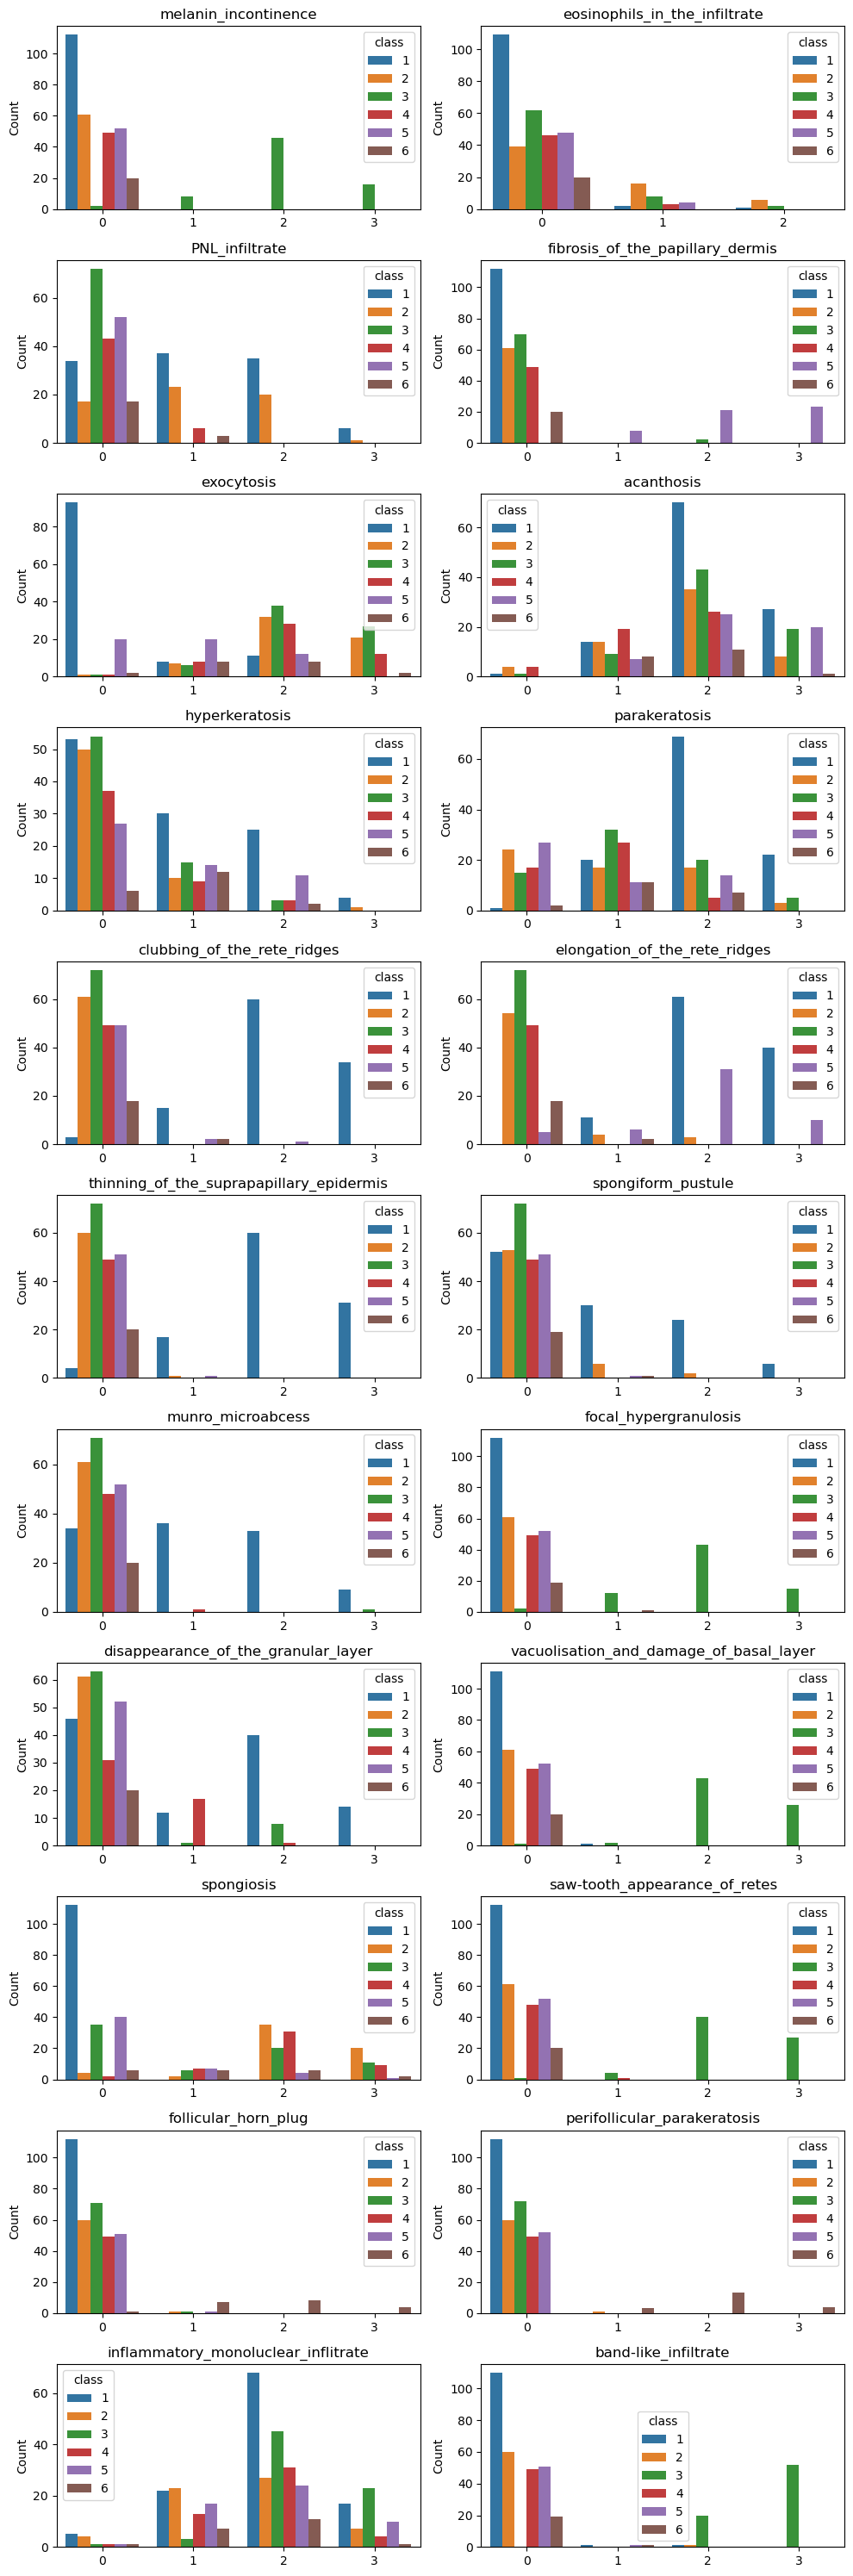

In [454]:
plt.figure(figsize=(10,30))
plotnumber=1
for i in data2:
    plt.subplot(11,2,plotnumber)
    sns.countplot(x=data2[i],hue=data['class'])
    plt.xlabel('')
    plt.ylabel('Count')
    plt.title(i, loc='center')
    plotnumber=plotnumber+1
    
plt.tight_layout()

## Data Preprocessing

In [455]:
data.isnull().sum()

erythema                                    0
scaling                                     0
definite_borders                            0
itching                                     0
koebner_phenomenon                          0
polygonal_papules                           0
follicular_papules                          0
oral_mucosal_involvement                    0
knee_and_elbow_involvement                  0
scalp_involvement                           0
family_history                              0
melanin_incontinence                        0
eosinophils_in_the_infiltrate               0
PNL_infiltrate                              0
fibrosis_of_the_papillary_dermis            0
exocytosis                                  0
acanthosis                                  0
hyperkeratosis                              0
parakeratosis                               0
clubbing_of_the_rete_ridges                 0
elongation_of_the_rete_ridges               0
thinning_of_the_suprapapillary_epi

In [456]:
data.Age.unique()

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 10, 65, 38, 23, 17,
       51, 42, 44, 33, 43, 50, 34, -1, 15, 46, 62, 35, 48, 12, 52, 60, 32,
       19, 29, 25, 36, 13, 27, 31, 28, 64, 39, 47, 16,  0,  7, 70, 37, 61,
       67, 56, 53, 24, 58, 49, 63, 68,  9, 75])

- There is no null values in dataset. but in 'Age' column, some values are corrupted,indicated'?', which we replaced with'-1' values with median

In [457]:
data.loc[data.Age == -1]

,erythema,scaling,definite_borders,itching,koebner_phenomenon,polygonal_papules,follicular_papules,oral_mucosal_involvement,knee_and_elbow_involvement,scalp_involvement,family_history,melanin_incontinence,eosinophils_in_the_infiltrate,PNL_infiltrate,fibrosis_of_the_papillary_dermis,exocytosis,acanthosis,hyperkeratosis,parakeratosis,clubbing_of_the_rete_ridges,elongation_of_the_rete_ridges,thinning_of_the_suprapapillary_epidermis,spongiform_pustule,munro_microabcess,focal_hypergranulosis,disappearance_of_the_granular_layer,vacuolisation_and_damage_of_basal_layer,spongiosis,saw-tooth_appearance_of_retes,follicular_horn_plug,perifollicular_parakeratosis,inflammatory_monoluclear_inflitrate,band-like_infiltrate,Age,class
33,2,2,1,0,0,0,0,0,1,0,1,0,0,2,0,0,2,1,2,2,1,2,0,1,0,0,0,0,0,0,0,0,0,-1,1
34,2,1,0,0,2,0,0,0,0,0,0,0,0,0,0,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,4
35,2,2,1,2,0,0,0,0,0,0,0,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,2
36,2,1,2,3,2,3,0,2,0,0,1,1,0,0,0,2,1,1,2,0,0,0,0,0,1,0,2,0,2,0,0,0,3,-1,3
262,2,1,0,2,0,0,0,0,0,0,0,0,0,0,2,1,3,2,2,1,3,0,0,0,0,0,0,2,0,0,0,3,0,-1,5
263,1,1,1,3,0,0,0,0,0,0,0,0,0,0,3,2,3,1,2,2,2,0,0,0,0,0,0,3,0,0,0,2,0,-1,5
264,1,1,0,2,0,0,0,0,1,0,0,0,0,0,3,2,3,2,1,1,3,0,0,0,0,0,0,2,0,0,0,3,0,-1,5
265,1,1,0,3,0,0,0,0,0,0,0,0,0,0,2,1,3,1,1,0,2,0,1,0,0,0,0,2,0,0,0,3,0,-1,5


In [458]:
data.loc[data.Age==-1,'Age']=np.median(data.Age)
data.Age.values

array([55,  8, 26, 40, 45, 41, 18, 57, 22, 30, 20, 21, 22, 10, 65, 40, 30,
       38, 23, 17,  8, 51, 42, 44, 22, 33, 10, 17, 43, 50, 50, 10, 34, 35,
       35, 35, 35, 15, 26, 46, 51, 62, 15, 35, 30, 48, 46, 12, 52, 60, 32,
       35, 41, 48, 51, 19, 22, 29, 25, 33,  8, 40, 33, 42, 36, 60, 36, 21,
       40, 21, 34, 13, 52, 48, 17, 25, 33, 62, 52, 27, 40, 31, 27, 10, 55,
       30, 42, 48, 22, 31, 50, 43, 30, 42, 22, 18, 35, 60, 28, 13, 20, 64,
       43, 20, 34, 39, 60, 38, 44, 36, 41, 18, 39, 40, 47, 16, 27, 52, 25,
        0, 33, 46,  7, 30, 29, 23,  8, 44, 17, 16, 55, 40, 34, 29, 34, 25,
       70, 37, 41, 32, 20, 19, 61, 27, 36, 40, 52, 27, 30, 45, 34, 27, 46,
       52, 28, 40, 55, 32, 33, 47, 35, 61, 22, 10, 20, 55, 67, 51, 20, 22,
       45, 55, 56, 18, 40, 30, 33, 40, 42, 36, 27, 56, 60, 20,  7, 30, 19,
       52, 55, 23, 50, 38, 25, 18, 35, 22, 52, 50, 33, 44, 18, 25, 52, 35,
       40, 55, 20, 60, 33, 27, 50, 70, 28, 30, 53, 27, 50, 42, 45, 35, 30,
       42, 18, 25, 36, 40

In [459]:
for i in data:
    if len(data[i].value_counts())<5:
        print(data[i].value_counts())
        print("--------------------------")
#Hence no corrupted values in the data


2    215
3     90
1     57
0      4
Name: erythema, dtype: int64
--------------------------
2    195
1    111
3     52
0      8
Name: scaling, dtype: int64
--------------------------
2    168
1     93
0     59
3     46
Name: definite_borders, dtype: int64
--------------------------
0    118
2    100
3     76
1     72
Name: itching, dtype: int64
--------------------------
0    224
1     70
2     54
3     18
Name: koebner_phenomenon, dtype: int64
--------------------------
0    297
2     41
3     27
1      1
Name: polygonal_papules, dtype: int64
--------------------------
0    333
2     16
1     11
3      6
Name: follicular_papules, dtype: int64
--------------------------
0    299
2     45
3     13
1      9
Name: oral_mucosal_involvement, dtype: int64
--------------------------
0    251
2     64
1     28
3     23
Name: knee_and_elbow_involvement, dtype: int64
--------------------------
0    264
2     56
1     30
3     16
Name: scalp_involvement, dtype: int64
--------------------------
0 

#### Handling With Outliers

#### All the values are categorical except the Age 

<Axes: >

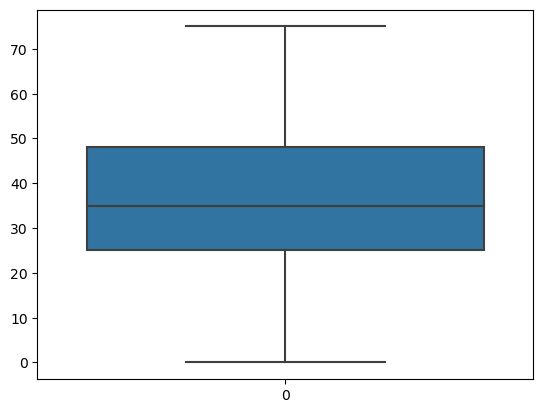

In [460]:
sns.boxplot(data.Age)

### Conversion of Data
No need for the conversion of categorical data to numerical values since all columns already contain numerical data

##### There is no need to conversion to numerical because all the values in numerical

### Scaling
- Given that all columns in the dataset are categorical and their values range from 0 to 4, scaling is unnecessary for this particular dataset.


### Feature selection
Feature Selection is unnecessary for this dataset. In this case the only 'age' column is continous variable.while all other the columns are categorical

## Model Creation

In [461]:
#splitting the data into x and y
x = data.iloc[:,:-1]
y = data['class']

In [462]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)


In [463]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(274, 34)
(274,)
(92, 34)
(92,)


## BALANCING

In [464]:
data['class'].value_counts()

1    112
3     72
2     61
5     52
4     49
6     20
Name: class, dtype: int64

Text(0.5, 1.0, 'Distribution of Categories')

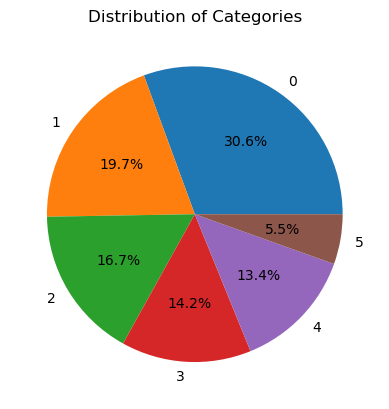

In [465]:
plt.pie(data['class'].value_counts(),labels=[0,1,2,3,4,5], autopct='%1.1f%%')
plt.title('Distribution of Categories')


In [466]:
sm=SMOTE()

In [467]:
x_sm,y_sm=sm.fit_resample(x_train ,y_train)


In [468]:
print(x_sm.shape)
print(y_sm.shape)


(468, 34)
(468,)


## Model Creation By Logistic Regression

In [1]:
clf=LogisticRegression()
clf.fit(X_train,y_train)

NameError: name 'LogisticRegression' is not defined

In [470]:
clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [471]:
y_pred_lr = clf.predict(x_test)

In [472]:
y_pred_lr_train = clf.predict(x_train)


In [473]:
#creating model using balanced data
lr1 = LogisticRegression(multi_class='ovr')
lr1.fit(x_sm,y_sm)


LogisticRegression(multi_class='ovr')

In [474]:
y_pred_lr_prob = lr1.predict(x_test)


## Model Evaluation Logistic_Regression


In [475]:
print(" accuracy_score for balanced data :" ,accuracy_score(y_test,y_pred_lr_prob))


 accuracy_score for balanced data : 0.967391304347826


In [476]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_lr)}")


 accuracy_score for test data : 0.9782608695652174


In [477]:
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_lr_train)}")


 accuracy_score for train data : 0.9927007299270073


In [478]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_lr)}")


classification_report for test data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        17
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92



In [479]:
print(f"classification_report for train data : {classification_report(y_train,y_pred_lr_train)}")


classification_report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       1.00      0.96      0.98        49
           3       1.00      1.00      1.00        55
           4       0.95      1.00      0.97        38
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        16

    accuracy                           0.99       274
   macro avg       0.99      0.99      0.99       274
weighted avg       0.99      0.99      0.99       274



### Model Creation By K Nearest Neighbour Classifier

In [480]:
# Running the model with different nearest neighbours number to check which will gives us least error rate
err_rate = []
for i in range(1,11):
    knn1 = KNeighborsClassifier(n_neighbors= i)
    knn1.fit(x_train,y_train)
    y_pred1 = knn1.predict(x_test)
    error_rate = (y_test !=y_pred1).sum()/len(y_test) * 100
    err_rate.append(error_rate)
print(err_rate)


[8.695652173913043, 10.869565217391305, 15.217391304347828, 19.565217391304348, 23.91304347826087, 22.82608695652174, 26.08695652173913, 25.0, 23.91304347826087, 29.347826086956523]


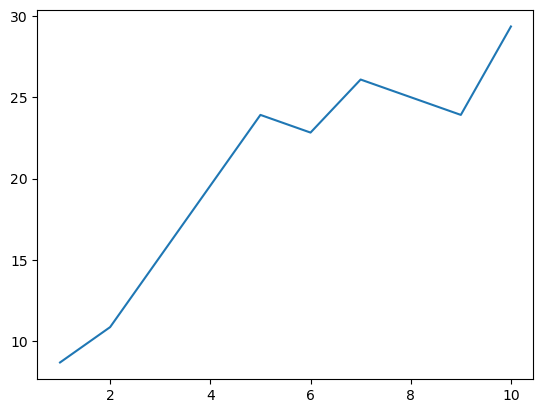

In [481]:
# plotting to check the nearest neighbours with least error rate
plt.plot(range(1,11),err_rate)

In [482]:
knn_model = KNeighborsClassifier()

In [483]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [484]:
y_pred_knn = knn_model.predict(x_test)


In [485]:
y_pred_knn_train = knn_model.predict(x_train)


## Model Evaluation KNN - Classifier

In [486]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_knn)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_knn_train)}")


 accuracy_score for test data : 0.7608695652173914
 accuracy_score for train data : 0.9306569343065694


In [487]:
print(f"classification_report for test data : {classification_report(y_test,y_pred_knn)}")
print(f"classification_report for train data : {classification_report(y_train,y_pred_knn_train)}")

classification_report for test data :               precision    recall  f1-score   support

           1       1.00      0.88      0.94        34
           2       0.46      0.50      0.48        12
           3       1.00      1.00      1.00        17
           4       0.35      0.55      0.43        11
           5       0.80      0.57      0.67        14
           6       0.60      0.75      0.67         4

    accuracy                           0.76        92
   macro avg       0.70      0.71      0.70        92
weighted avg       0.80      0.76      0.78        92

classification_report for train data :               precision    recall  f1-score   support

           1       1.00      0.99      0.99        78
           2       0.85      0.84      0.85        49
           3       1.00      1.00      1.00        55
           4       0.73      0.87      0.80        38
           5       1.00      0.87      0.93        38
           6       1.00      1.00      1.00        16



## Hyperparameter Tuning by KNN

In [488]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],
    'p': [1, 2]                         
}

In [489]:
# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [490]:
grid_search.best_params_


{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

In [491]:
best_knn_model = grid_search.best_estimator_


In [492]:
knn_pred = best_knn_model.predict(x_test)


In [493]:
accuracy = accuracy_score(y_test, knn_pred)
print("Accuracy of the Best Model:", accuracy)

Accuracy of the Best Model: 0.9239130434782609


## Model Creation By Support Vector Machine(SVM)



In [494]:
svc = SVC()

In [495]:
svc.fit(x_train,y_train)

SVC()

In [496]:
y_pred_svc = svc.predict(x_test)

In [497]:
y_pred_svc_train = svc.predict(x_train)

## Model Evaluation By Support Vector Machine

In [498]:
print(f" accuracy_score for test data : {accuracy_score(y_test,y_pred_svc)}")
print(f" accuracy_score for train data : {accuracy_score(y_train,y_pred_svc_train)}")


 accuracy_score for test data : 0.7065217391304348
 accuracy_score for train data : 0.7335766423357665


In [499]:
print(f" Classification report for test data: {classification_report(y_test,y_pred_svc)}")
print(f"Classification report for train data: {classification_report(y_train,y_pred_svc_train)}")

 Classification report for test data:               precision    recall  f1-score   support

           1       0.89      0.97      0.93        34
           2       0.35      1.00      0.52        12
           3       1.00      1.00      1.00        17
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        14
           6       0.75      0.75      0.75         4

    accuracy                           0.71        92
   macro avg       0.50      0.62      0.53        92
weighted avg       0.59      0.71      0.63        92

Classification report for train data:               precision    recall  f1-score   support

           1       0.90      0.96      0.93        78
           2       0.44      0.94      0.60        49
           3       1.00      1.00      1.00        55
           4       0.00      0.00      0.00        38
           5       1.00      0.24      0.38        38
           6       0.70      1.00      0.82        16

 

## Hyperparameter Tuning - Support Vector Machine

In [500]:
svm_param_grid = param_grid = {
    'C': [0.1, 1 , 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.001, 0.01, 0.1],
}

In [501]:
svm_grid_search = GridSearchCV(svc, svm_param_grid, refit = True, verbose= 2, scoring='f1',cv = 5)

In [502]:
svm_grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.01, k

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=2)

In [503]:
svm_grid_search.best_params_

{'C': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [504]:
svm_grid_search.best_estimator_

SVC(C=0.1, gamma=0.001, kernel='linear')

In [505]:
svm_best_model = SVC(C=0.1, gamma = 0.001, kernel = 'linear')


In [506]:
svm_best_model.fit(x_train,y_train)

SVC(C=0.1, gamma=0.001, kernel='linear')

In [507]:
svm_pred = svm_best_model.predict(x_test)
svm_pred_train = svm_best_model.predict(x_train)

## Model Evaluation SVM

In [508]:
print(f"accuracy score for test data : {accuracy_score(y_test,svm_pred)}")
print(f"accuracy score for train data : {accuracy_score(y_train,svm_pred_train)}")

accuracy score for test data : 0.9565217391304348
accuracy score for train data : 0.9854014598540146


In [509]:
print(f"Classification report for test data:{classification_report(y_test,svm_pred)}")
print(f"Classification report for test data:{classification_report(y_train,svm_pred_train)}")


Classification report for test data:              precision    recall  f1-score   support

           1       1.00      0.97      0.99        34
           2       0.80      1.00      0.89        12
           3       1.00      1.00      1.00        17
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00        14
           6       0.75      0.75      0.75         4

    accuracy                           0.96        92
   macro avg       0.92      0.92      0.92        92
weighted avg       0.96      0.96      0.96        92

Classification report for test data:              precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       0.96      0.96      0.96        49
           3       1.00      1.00      1.00        55
           4       0.95      0.95      0.95        38
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        16

    a

## Model Creation By Decision Tree Classifier

In [510]:
Dtc = DecisionTreeClassifier()

In [511]:
Dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [512]:
y_pred_Dtc = Dtc.predict(x_test)

In [513]:
y_pred_Dtc_train = Dtc.predict(x_train)

## Model Evaluation Decision Tree

In [514]:
print(f" accuracy score for test data :{accuracy_score(y_test,y_pred_Dtc)}")
print(f" accuracy score for test data :{accuracy_score(y_train,y_pred_Dtc_train)}")

 accuracy score for test data :0.967391304347826
 accuracy score for test data :1.0


In [515]:
print(f" classification Report for test data :{classification_report(y_test,y_pred_Dtc)}")
print(f" Classification Report for test data :{classification_report(y_train,y_pred_Dtc_train)}")

 classification Report for test data :              precision    recall  f1-score   support

           1       0.97      0.97      0.97        34
           2       0.92      1.00      0.96        12
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        14
           6       0.75      0.75      0.75         4

    accuracy                           0.97        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.97      0.97      0.97        92

 Classification Report for test data :              precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        16

 

#### No need of hyperparameter tuning because we are satisfied with the accuracy score 

## Model Evaluation Decision Tree

In [516]:
Dtc.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [517]:
dt_pred = Dtc.predict(x_test)


In [518]:
y_pred_train = Dtc.predict(x_train)
y_pred_train

array([3, 4, 3, 5, 2, 1, 4, 5, 2, 4, 1, 1, 1, 2, 2, 4, 1, 1, 6, 2, 3, 5,
       5, 5, 2, 3, 4, 2, 1, 4, 2, 3, 2, 1, 1, 3, 1, 1, 1, 2, 3, 3, 5, 1,
       3, 1, 4, 2, 2, 1, 1, 1, 5, 1, 3, 2, 5, 1, 1, 2, 3, 2, 5, 5, 5, 3,
       2, 3, 6, 4, 6, 3, 1, 4, 2, 2, 3, 1, 6, 2, 1, 1, 2, 2, 3, 4, 4, 4,
       3, 2, 6, 1, 5, 3, 1, 5, 3, 5, 1, 3, 4, 2, 4, 3, 5, 2, 1, 3, 5, 1,
       3, 3, 2, 4, 1, 1, 3, 4, 5, 3, 2, 4, 1, 3, 5, 5, 6, 6, 5, 1, 3, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 6, 2, 5, 4, 1, 1, 4, 1, 4, 3, 3, 5, 1,
       4, 4, 2, 1, 4, 6, 1, 1, 1, 1, 3, 4, 3, 2, 5, 5, 3, 1, 1, 3, 1, 6,
       1, 6, 5, 4, 5, 2, 2, 4, 3, 1, 3, 5, 1, 5, 4, 2, 3, 2, 2, 1, 5, 3,
       4, 3, 1, 1, 3, 5, 5, 3, 1, 5, 4, 5, 2, 2, 3, 3, 4, 1, 1, 1, 3, 1,
       1, 4, 5, 2, 1, 5, 1, 1, 3, 1, 1, 1, 2, 5, 4, 1, 1, 1, 5, 3, 3, 1,
       3, 2, 3, 4, 2, 1, 3, 2, 3, 4, 1, 3, 1, 6, 4, 4, 2, 1, 1, 6, 3, 1,
       3, 5, 1, 6, 2, 6, 4, 4, 6, 1], dtype=int64)

In [519]:
y_train_pred_sm = dt.predict(x_sm)
y_train_pred_sm

array([3, 4, 3, 5, 2, 1, 4, 5, 2, 4, 1, 1, 1, 2, 2, 4, 1, 1, 6, 2, 3, 5,
       5, 5, 2, 3, 4, 2, 1, 4, 2, 3, 2, 1, 1, 3, 1, 1, 1, 2, 3, 3, 5, 1,
       3, 1, 4, 2, 2, 1, 1, 1, 5, 1, 3, 2, 5, 1, 1, 2, 3, 2, 5, 5, 5, 3,
       2, 3, 6, 4, 6, 3, 1, 4, 2, 2, 3, 1, 6, 2, 1, 1, 2, 2, 3, 4, 4, 4,
       3, 2, 6, 1, 5, 3, 1, 5, 3, 5, 1, 3, 4, 2, 4, 3, 5, 2, 1, 3, 5, 1,
       3, 3, 2, 4, 1, 1, 3, 4, 5, 3, 2, 4, 1, 3, 5, 5, 6, 6, 5, 1, 3, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 6, 2, 5, 4, 1, 1, 4, 1, 4, 3, 3, 5, 1,
       4, 4, 2, 1, 4, 6, 1, 1, 1, 1, 3, 4, 3, 2, 5, 5, 3, 1, 1, 3, 1, 6,
       1, 6, 5, 4, 5, 2, 2, 4, 3, 1, 3, 5, 1, 5, 4, 2, 3, 2, 2, 1, 5, 3,
       4, 3, 1, 1, 3, 5, 5, 3, 1, 5, 4, 5, 2, 2, 3, 3, 4, 1, 1, 1, 3, 1,
       1, 4, 5, 2, 1, 5, 1, 1, 3, 1, 1, 1, 2, 5, 4, 1, 1, 1, 5, 3, 3, 1,
       3, 2, 3, 4, 2, 1, 3, 2, 3, 4, 1, 3, 1, 6, 4, 4, 2, 1, 1, 6, 3, 1,
       3, 5, 1, 6, 2, 6, 4, 4, 6, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2,

In [520]:
print(f" accuracy score for test data :{accuracy_score(y_test,dt_pred)}")
print(f" accuracy score for train data :{accuracy_score(y_train,y_pred_train)}")


 accuracy score for test data :0.9782608695652174
 accuracy score for train data :1.0


In [521]:
print(f" Classification Report for test data :{classification_report(y_test,y_pred_Dtc)}")
print(f" Classification Report for train data :{classification_report(y_train,y_pred_Dtc_train)}")

 Classification Report for test data :              precision    recall  f1-score   support

           1       0.97      0.97      0.97        34
           2       0.92      1.00      0.96        12
           3       1.00      0.94      0.97        17
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        14
           6       0.75      0.75      0.75         4

    accuracy                           0.97        92
   macro avg       0.94      0.94      0.94        92
weighted avg       0.97      0.97      0.97        92

 Classification Report for train data :              precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        16



## Model creation By using Random Forest Classifier

In [522]:
rfc = RandomForestClassifier()

In [523]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [524]:
y_pred_rfc = rfc.predict(x_test)

In [525]:
y_pred_rfc_train = rfc.predict(x_train)

## Model Evaluation Random Forest Classifier

In [526]:
print(f" accuracy_score for test data : {accuracy_score (y_test, y_pred_rfc)}")
print(f" accuracy_score for train data : {accuracy_score (y_train, y_pred_rfc_train)}")

 accuracy_score for test data : 0.9782608695652174
 accuracy_score for train data : 1.0


In [527]:
print(f" Classification report for test data : {classification_report (y_test, y_pred_rfc)}")
print(f" Classification report for train data : {classification_report (y_train, y_pred_rfc_train)}")

 Classification report for test data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        34
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        17
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00         4

    accuracy                           0.98        92
   macro avg       0.98      0.97      0.97        92
weighted avg       0.98      0.98      0.98        92

 Classification report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        16

## Hyperparameter Tuning for Random Forest

In [528]:
param_grid  = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2', None]    
    
}

In [529]:
random_search = RandomizedSearchCV(rfc , param_distributions=param_grid, n_iter=10, cv =5 , random_state=42)

In [530]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [531]:
best_model = random_search.best_estimator_

In [532]:
rfc_pred = best_model.predict(x_test)
rfc_pred_train = best_model.predict(x_train)

## Model Evaluation - Random Forest

In [533]:
print(f" accuracy score for test data : {accuracy_score(y_test,rfc_pred)}")
print(f" accuracy score for train data : {accuracy_score(y_train,rfc_pred_train)}")

 accuracy score for test data : 0.967391304347826
 accuracy score for train data : 1.0


In [534]:
print(f" classification report for test data : {classification_report(y_test,rfc_pred)}")
print(f" classification report for train data : {classification_report(y_train,rfc_pred_train)}")

 classification report for test data :               precision    recall  f1-score   support

           1       0.97      1.00      0.99        34
           2       0.86      1.00      0.92        12
           3       1.00      1.00      1.00        17
           4       1.00      0.82      0.90        11
           5       1.00      1.00      1.00        14
           6       1.00      0.75      0.86         4

    accuracy                           0.97        92
   macro avg       0.97      0.93      0.94        92
weighted avg       0.97      0.97      0.97        92

 classification report for train data :               precision    recall  f1-score   support

           1       1.00      1.00      1.00        78
           2       1.00      1.00      1.00        49
           3       1.00      1.00      1.00        55
           4       1.00      1.00      1.00        38
           5       1.00      1.00      1.00        38
           6       1.00      1.00      1.00        16

## By using Bagging base Estimator is Decision Tree

In [535]:
#import bagging
from sklearn.ensemble import BaggingClassifier 

In [536]:
model_bagg = BaggingClassifier(base_estimator=best_model, n_estimators=30, random_state=15)

In [537]:
model_bagg.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=False,
                                                        max_depth=30,
                                                        n_estimators=50),
                  n_estimators=30, random_state=15)

In [538]:
y_prd_bagg = model_bagg.predict(x_test)

In [543]:
y_bagg_train = model_bagg.predict(x_train)

In [545]:
print(f" accuracy score for test data : {accuracy_score(y_test,y_prd_bagg)}")
print(f" accuracy score for train data : {accuracy_score(y_train,y_bagg_train)}")

 accuracy score for test data : 0.9782608695652174
 accuracy score for train data : 1.0


In [546]:
models = ['LogisticRegression','K Nearest Neighbors','SVM','Decision Tree','Random Forest','Bagging']
accuracy_scores = [accuracy_score(y_test,y_pred_lr),accuracy_score(y_test, knn_pred),accuracy_score(y_test,svm_pred),accuracy_score(y_test,dt_pred),accuracy_score(y_test,rfc_pred),accuracy_score(y_test,y_prd_bagg)]

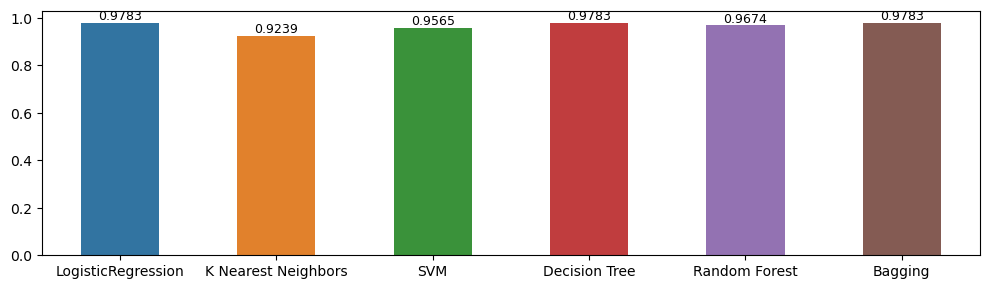

In [547]:
plt.figure(figsize=(10,3))
bar_plot  = sns.barplot(x = models, y = accuracy_scores, width = 0.5)

for index, value in enumerate(accuracy_scores):
    bar_plot.text(index, value + 0.001, f'{value:.4f}',ha = 'center', va = 'bottom', fontsize=9)
    
plt.tight_layout()
plt.show()

## Comparision

### Logistic Regression:
Accuracy Score:0.9782608695652174
- Logistic regression has the advantage of being computationally efficient, interpretable, and well-suited for cases where the relationship between the independent variables and the log-odds of the dependent variable is approximately linear

### K Nearest Negihbour:
Accuracy Score:0.9239130434782609
- KNN is able to handle the non-linear relationships in data without making strong assumptions.


### Support Vector Machine:
Accuracy Score:0.9565217391304348
- SVMs are effective in high-dimensional spaces and can handle non-linear relationships.


### Decision Tree:
Accuracy Score:0.9782608695652174
- Decision trees may be prone to overfitting, and their interpretability is a strength.


### Random Forest:
Accuracy Score:0.967391304347826
- Random Forests are an ensemble method known for handling complex relationships and reducing overfitting.


### Bagging:
Accuracy Score:0.9782608695652174
- Bagging reduces overfitting and improves model robustness,enhancing the generalization performance of the model.


# Result
Among various models, Logistic Regression and Decision Tree stand out as the most suitable models for this dataset.
